Dataset Shape: (18398, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     

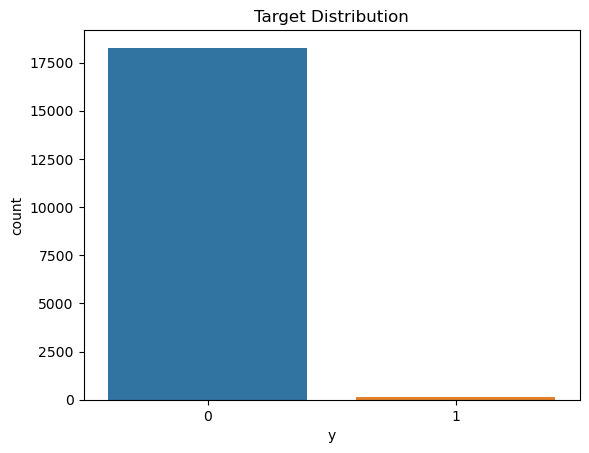

ValueError: could not convert string to float: '5-1-99 0:00'

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load Dataset
file_path = 'AnomaData.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Convert date column to datetime and sort (if applicable)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data = data.sort_values('date')

# Exploratory Data Analysis (EDA)
print("Dataset Shape:", data.shape)
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize target variable distribution
sns.countplot(x='y', data=data)
plt.title('Target Distribution')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Treat missing values
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)

# Feature Engineering
X = data.drop(columns=['y'])
y = data['y']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Baseline Model - Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Final Evaluation
y_pred_final = best_model.predict(X_test)
y_pred_final_proba = best_model.predict_proba(X_test)[:, 1]

print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final ROC-AUC Score:", roc_auc_score(y_test, y_pred_final_proba))

# Model Deployment Plan
"""
1. Export the trained model using joblib or pickle.
2. Build a Flask API to serve predictions.
3. Create an endpoint where incoming data can be sent as JSON.
4. Use the model to make predictions and return the results.
5. Optionally, containerize the solution using Docker.
"""

# Exporting the model
import joblib
joblib.dump(best_model, 'anomaly_detection_model.pkl')
print("Model saved as anomaly_detection_model.pkl")
